# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Логистическая регрессия":

https://clck.ru/32AKdJ

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель логистической регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения логистической регрессии (т.е. уравнение разделяющей поверхности). Сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему
5. Написать уравнение логистической регрессии.
6. Вывести confusion matrix для получившейся модели.
7. Вручную посчитать метрики: accuracy, recall, precision. f1.
8. Посчитать метрики с помощью библиотеки sklearn и сравнить с оценками из п.7.
9. Сделать письменный вывод получившихся результатов (хорошие или плохие получлись метрики и почему).

ВСЕ графики должны быть подписанны.
Ваша задача получить метрики как можно лучше.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [20]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult (1).csv


In [22]:
df = pd.read_csv("adult.csv")
df.head()
     

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [23]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [24]:
df = df.drop(columns = ['workclass', 'education', 'occupation','native.country',"relationship"])

In [25]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [26]:
d = {"<=50K": 0, ">50K": 1}
df["income"] = df["income"].map(d)

In [27]:
d = {"Female": 0, "Male": 1}
df["sex"] = df["sex"].map(d)

In [28]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [29]:
d = {"White": 0, "Black": 1,"Asian-Pac-Islander": 2,"Amer-Indian-Eskimo": 3,"Other": 4}
df["race"] = df["race"].map(d)

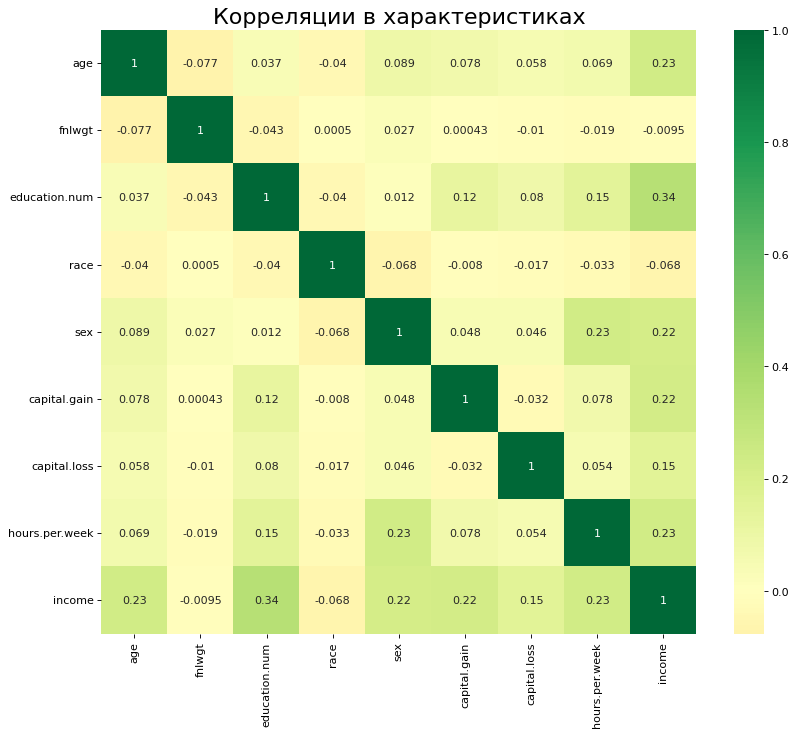

In [35]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [34]:
df = df.drop(columns = ['marital.status'])

In [37]:
y = df["income"]
X = df.drop(["income"], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
w0 = model.intercept_
w1 = model.coef_
w0

array([-0.00035707])

In [44]:
w1

array([[-7.28366595e-03, -3.65032940e-06, -1.74578686e-03,
        -1.88227557e-04,  1.14388775e-05,  3.38418911e-04,
         7.94566174e-04, -8.06768330e-03]])

In [47]:
s = f"y = {w0[0]}"
for i in range(len(w1[0])):
  s += f" + {w1[0][i]} * x{i + 1}"
print(s)

y = -0.0003570687343396626 + -0.007283665951648709 * x1 + -3.6503293961182013e-06 * x2 + -0.0017457868602269657 * x3 + -0.0001882275570487632 * x4 + 1.1438877540735351e-05 * x5 + 0.00033841891136531514 * x6 + 0.000794566174432289 * x7 + -0.008067683299965985 * x8


In [48]:
df

,age,fnlwgt,education.num,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,0,0,4356,40,0
1,82,132870,9,0,0,0,4356,18,0
2,66,186061,10,1,0,0,4356,40,0
3,54,140359,4,0,0,0,3900,40,0
4,41,264663,10,0,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,1,0,0,40,0
32557,27,257302,12,0,0,0,0,38,0
32558,40,154374,9,0,1,0,0,40,1
32559,58,151910,9,0,0,0,0,40,0


Самые важные признаки в порядке убывания: hours.per.week и age, потому что их коэффициенты по модулю имеют наибольшее значение




In [50]:
pred = model.predict(X_test)
confusion_matrix(y_test, pred)

array([[7174,  252],
       [1704,  639]])

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 7174
FP: 252
FN: 1704
TP: 639


In [54]:
print('accuracy',(tp + tn) / (tp + tn + fp + fn))
accuracy_score(y_test, pred)

accuracy 0.79977479782987


0.79977479782987

In [55]:
print('recall',tp / (tp + fn))
recall_score(y_test, pred)

recall 0.2727272727272727


0.2727272727272727

In [56]:
print('precision',tp / (tp + fp))
precision_score(y_test, pred)

precision 0.7171717171717171


0.7171717171717171

In [57]:
print('f1',2 * ((tp / (tp + fn)) * (tp / (tp + fp))) / ((tp / (tp + fn)) + (tp / (tp + fp))))
f1_score(y_test, pred)

f1 0.39517625231910947


0.39517625231910947

В целом, модель работает не плохо, потому что accuracy равен 0.8. А precision равен 0.7, только recall не очень хорошо, вследствие чего и падает f1.